We have the popular heart disease dataset at our disposal. We will now preprocess out datset
and make it ready for the train test split to train and test our decision trees and random 
forest model.

In [35]:
#Imorting necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [8]:
#Loading the dataset
df = pd.read_csv('heart.csv')

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
Y,N = df['target'].value_counts()
print('People who have heart disease : ',Y)
print("People who don't have heart disease : ",N)


People who have heart disease :  526
People who don't have heart disease :  499


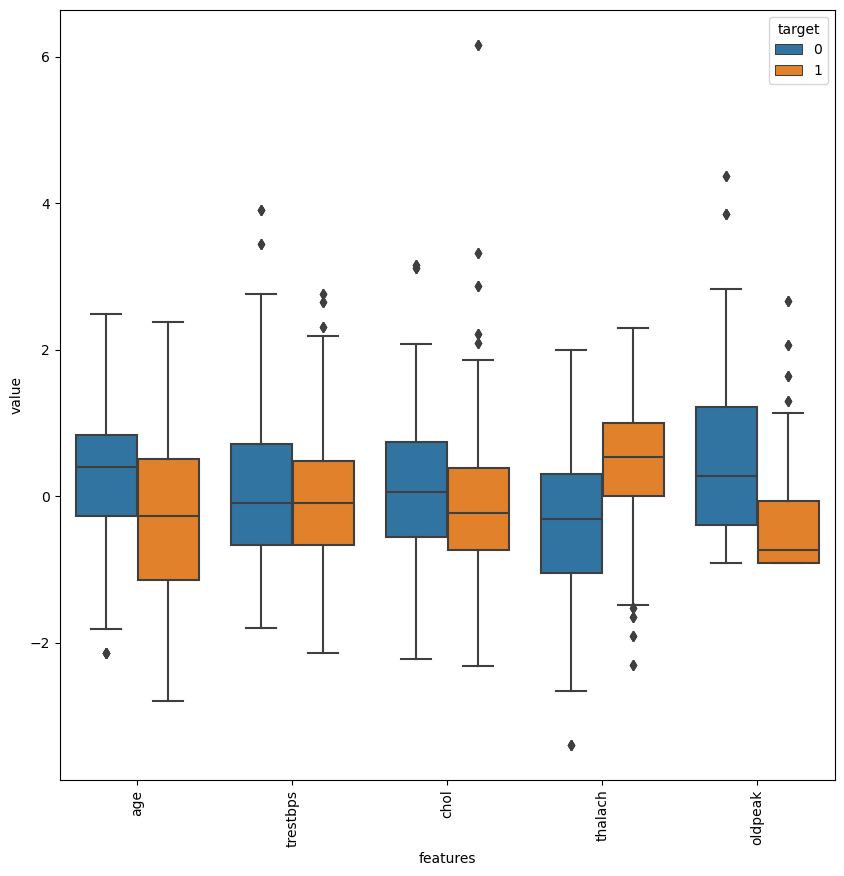

In [14]:

#features with continuous values
columns = ['age', 'trestbps', 'chol','thalach', 'oldpeak','target']
data = df[columns]
y = data['target']
x = data.drop('target', axis = 1)
data_norm = (x - x.mean()) / (x.std())
data = pd.concat([y , data_norm ], axis = 1 )
data = pd.melt(data,id_vars="target",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="target", data=data)
plt.xticks(rotation=90)
plt.show()


In [16]:
# For example, if 'sex' is 1 for female and 'target' indicates heart disease:

percentage_df = (
    df[df['sex'] == 1]
    ['target']
    .value_counts(normalize = True)*100
)
# This gives percentage of target=0 and target=1 among males
percentage_with_disease = percentage_df.get(1, 0)  # percentage of males with disease
print(f"Percentage of males with heart disease: {percentage_with_disease:.2f}%")

percentage_df = (
    df[df['sex'] == 0]
    ['target']
    .value_counts(normalize = True)*100
)
# This gives percentage of target=0 and target=1 among females
percentage_with_disease = percentage_df.get(1, 0)  # percentage of females with disease
print(f"Percentage of females with heart disease: {percentage_with_disease:.2f}%")


Percentage of males with heart disease: 42.08%
Percentage of females with heart disease: 72.44%


<Axes: >

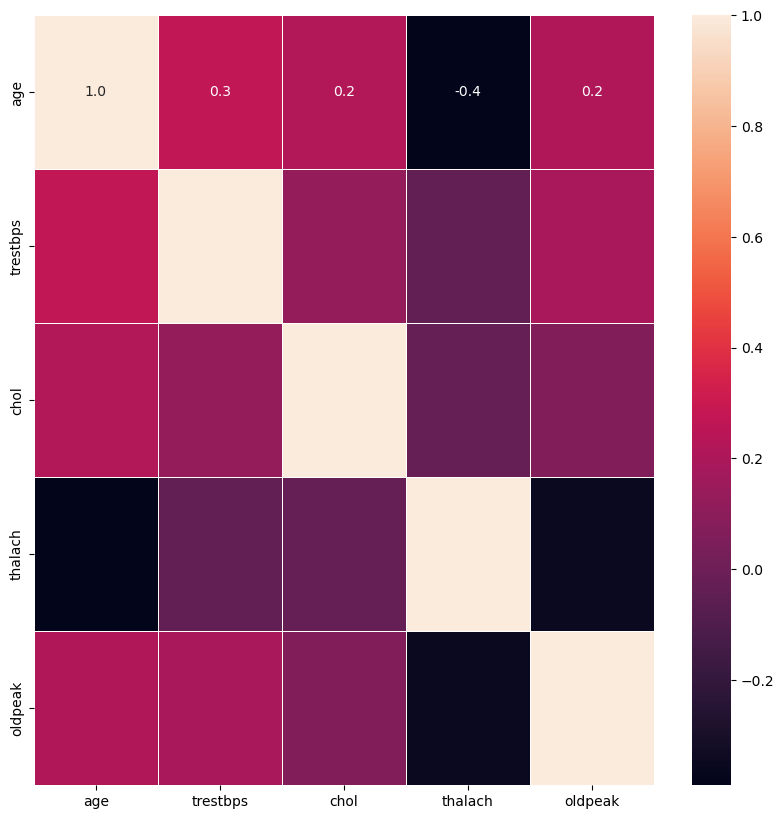

In [17]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

We see there almost no correlation among the features

In [43]:
#Lets train our decision trees model 
x_train, x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state = 41)
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

In [73]:
from sklearn import tree
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
clf = tree.DecisionTreeClassifier(max_leaf_nodes=6, random_state=0)
clf = clf.fit(X_train,y_train)


In [74]:
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
rf_acc_score = accuracy_score(y_test, y_pred)
print("confussion matrix")
print(conf_matrix)
print("\n")
print("Accuracy of Decision Trees:",rf_acc_score*100,'\n')
print(classification_report(y_test,y_pred))

confussion matrix
[[ 60  27]
 [ 18 100]]


Accuracy of Decision Trees: 78.04878048780488 

              precision    recall  f1-score   support

           0       0.77      0.69      0.73        87
           1       0.79      0.85      0.82       118

    accuracy                           0.78       205
   macro avg       0.78      0.77      0.77       205
weighted avg       0.78      0.78      0.78       205



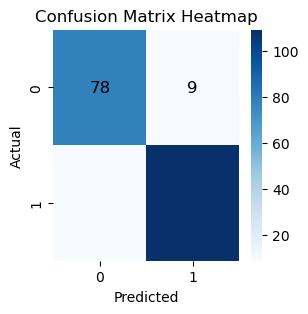

In [46]:
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={'size':12, 'color':'black'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [48]:
#Lets fir a random forest classifier in our dataset
rf = RandomForestClassifier(n_estimators=20, random_state=41,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[ 69  18]
 [ 17 101]]


Accuracy of Random Forest: 82.92682926829268 

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        87
           1       0.85      0.86      0.85       118

    accuracy                           0.83       205
   macro avg       0.83      0.82      0.83       205
weighted avg       0.83      0.83      0.83       205



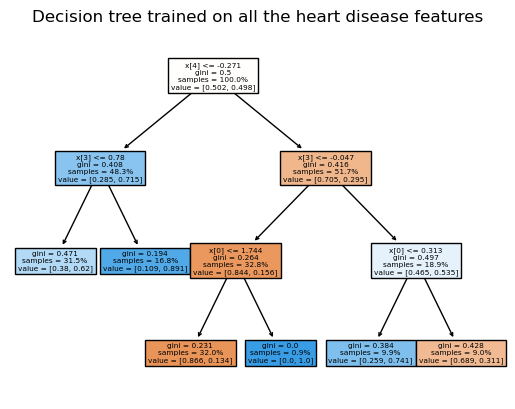

In [75]:
from sklearn.tree import plot_tree
plot_tree(clf, filled=True, proportion = True)
plt.title("Decision tree trained on all the heart disease features")
plt.show()